In [ ]:
#Predictive Modeling with Linear Regression📊

In [1]:
# import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# import datset
df = pd.read_csv('swedish_insurance.csv')
df.head(3)

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7


In [3]:
# rename of columns X and Y 
df.rename(columns={'X':'Claims', 'Y':'Payment'},inplace=True)
df.head(3)

,Claims,Payment
0,108,392.5
1,19,46.2
2,13,15.7


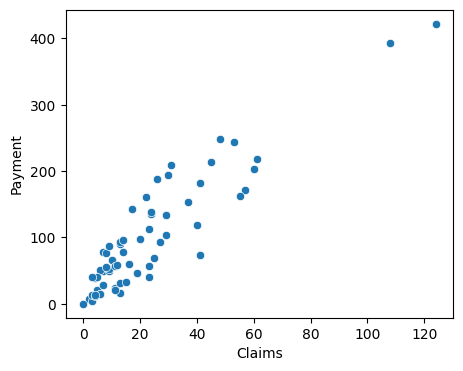

In [4]:
# check   datset is linear ?
plt.figure(figsize=(5,4))
sns.scatterplot(x='Claims',y='Payment',data=df)
plt.show()

In [5]:
df.describe()

,Claims,Payment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [6]:
# check null values 
print('Null values in dataset:\n',df.isnull().sum())
# check duplicats
print('Duplicate values in dataset:',df.duplicated().sum())

Null values in dataset:
 Claims     0
Payment    0
dtype: int64
Duplicate values in dataset: 0


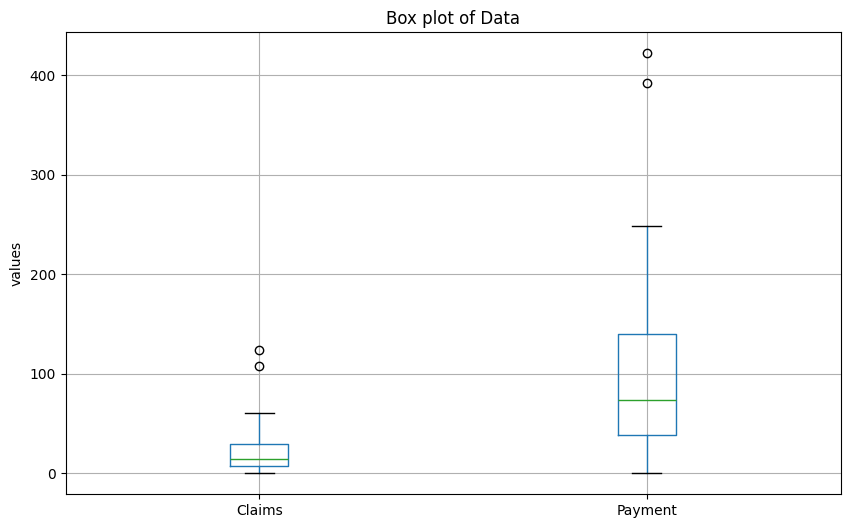

In [7]:
# check outliers
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Box plot of Data')
plt.ylabel('values')
plt.grid(True)
plt.show()

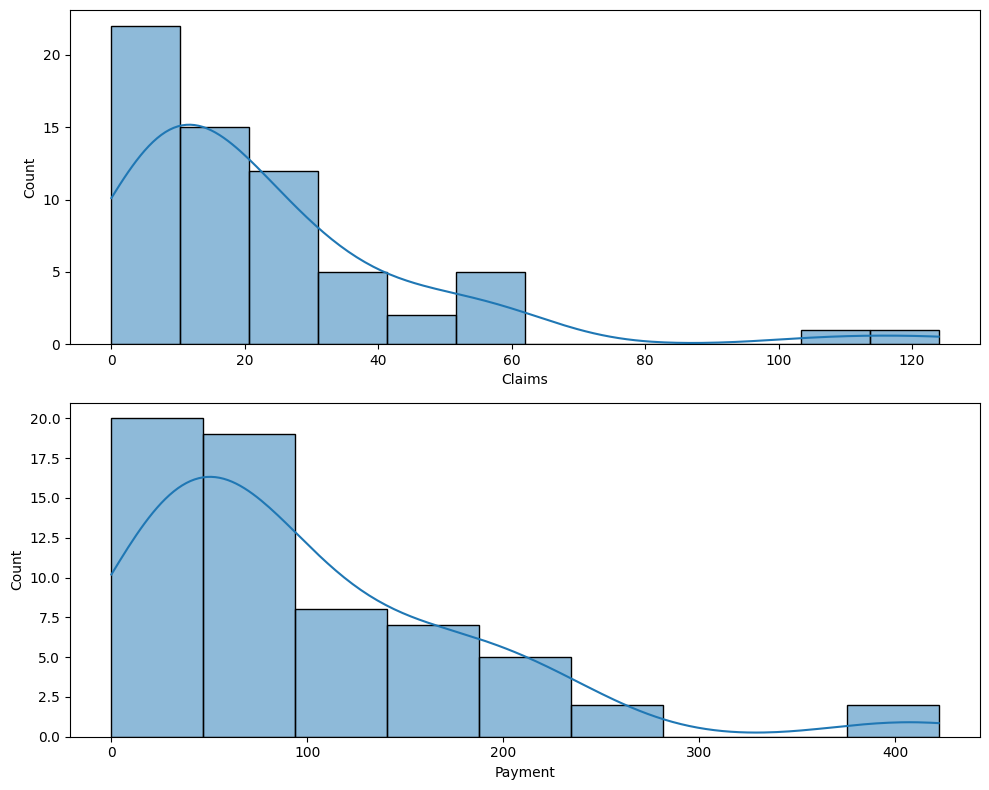

In [8]:
# hisplot of columns
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(df['Claims'],kde=True)
plt.subplot(2,1,2)
sns.histplot(df['Payment'], kde=True)
plt.tight_layout()
plt.show()

In [9]:
# handle outliers
# remove outliers form Claims column
min_range_cl=df['Claims'].mean()-3*df['Claims'].std()
max_range_cl=df['Claims'].mean()+3*df['Claims'].std()
df[df['Claims']<=max_range_cl]
# remove outliers form Payment column
min_range_py=df['Payment'].mean()-3*df['Payment'].std()
max_range_py=df['Payment'].mean()+3*df['Payment'].std()
df[df['Payment']<=max_range_py]

,Claims,Payment
1,19,46.2
2,13,15.7
4,40,119.4
5,57,170.9
6,23,56.9
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [10]:
# split data into X and y
X=df[['Claims']]
y=df['Payment']
# split data into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,y , test_size= 0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X)
print('Accuracy Score:',model.score(X_test,y_test)*100,'%')

Accuracy Score: 89.50819493918402 %


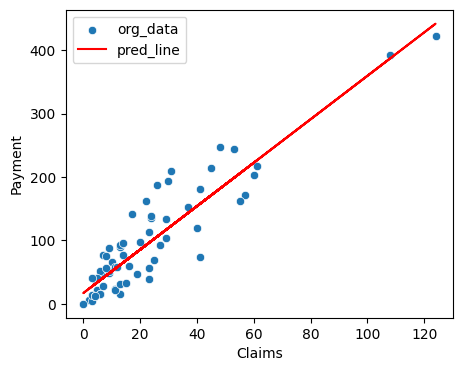

In [11]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='Claims',y='Payment',data=df)
plt.plot(df['Claims'],y_pred, color='Red')
plt.legend(['org_data','pred_line'])
plt.show()